In [71]:
#Import libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

def calcSkewness(data):
    skewness = 0 #Temporary
    pixelCount = (len(data)*len(data[0]))
    mean = data.mean()
    std = data.std()
    for row in range(0, len(data)):
        for col in range(0, len(data[0])):
            skewness += ((data[row, col] - mean)/std)**3
    skewness = skewness/(pixelCount-1)
    return skewness

#Open R file
hdu1 = fits.open('data/rim_R_wcs.fits')
RData = hdu1[0].data

print("Rows  = ", len(RData))
print("cols = ", len(RData[0]))

#Open Ha file
hdu2 = fits.open('data/rim_Ha_wcs.fits')
HaData = hdu2[0].data

#Open SII file
hdul3 = fits.open('data/rim_[SII]_wcs.fits')
SIIData = hdul3[0].data

#Subtract R data from Ha data
alteredHaData = []
muHa = 1
alteredHaData = HaData - (muHa*RData)
skewnessHa = calcSkewness(alteredHaData)
print("Skewness of Ha = ", skewnessHa)

#Subtract SII data from Ha data
alteredSIIData = []
muSII = 1
alteredSIIData = SIIData - (muSII*RData)
skewnessSII = calcSkewness(alteredSIIData)
print("Skewness of SII = ", skewnessSII)

Rows  =  1392
cols =  2080
Skewness of Ha =  24.065083
Skewness of SII =  12.813535


Text(0.5, 1.0, 'Original Rdata')

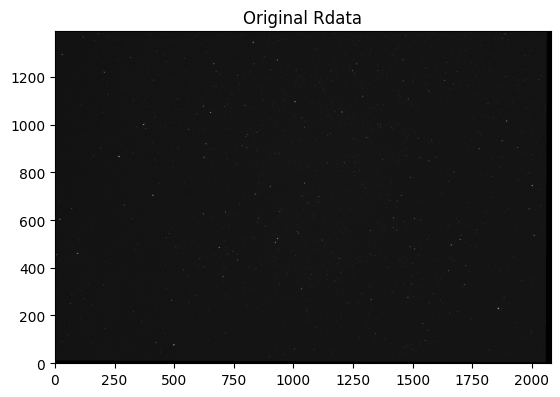

In [61]:
plt.imshow(RData, origin = 'lower', cmap = 'gray')
plt.title("Original Rdata")

Text(0.5, 1.0, 'Original Hadata')

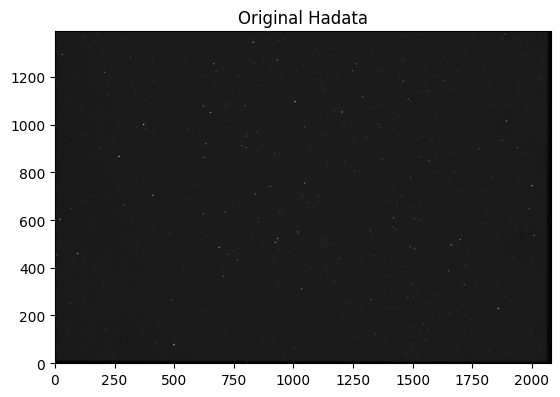

In [62]:
plt.imshow(HaData, origin = 'lower', cmap = 'gray')
plt.title("Original Hadata")

Text(0.5, 1.0, 'New Hadata')

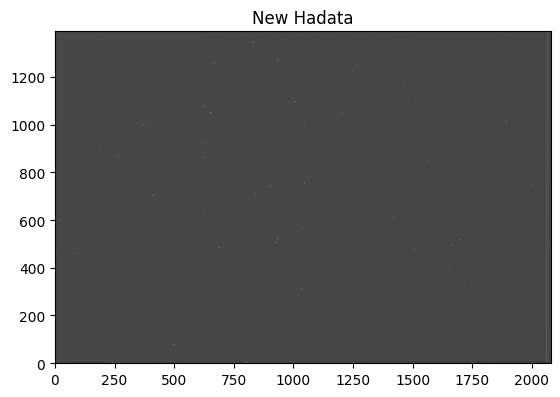

In [63]:
plt.imshow(alteredHaData, origin = 'lower', cmap = 'gray')
plt.title("New Hadata")

Text(0.5, 1.0, 'Old SIIdata')

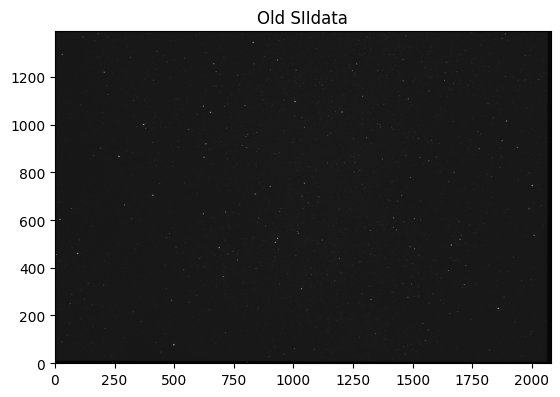

In [64]:
plt.imshow(SIIData, origin = 'lower', cmap = 'gray')
plt.title("Old SIIdata")

Text(0.5, 1.0, 'New SIIdata')

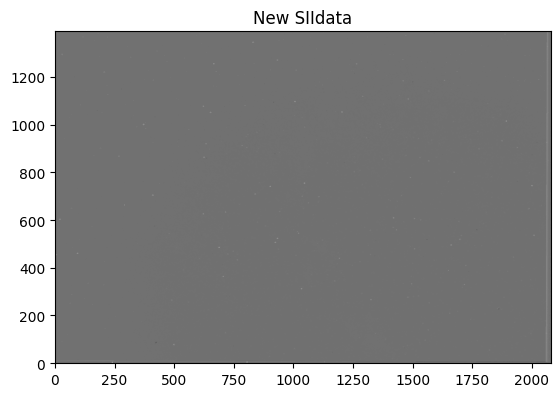

In [65]:
plt.imshow(alteredSIIData, origin = 'lower', cmap = 'gray')
plt.title("New SIIdata")